## Implementation of multiple linear regression in Real estate price prediction problem  

### Import the necesarry libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### Reading the data from csv file

In [ ]:
df=pd.read_csv('/content/Bengaluru_House_Data.csv')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [ ]:
df.shape

(13320, 9)

In [ ]:
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [ ]:
df["area_type"].value_counts()

,count
area_type,
Super built-up Area,8790
Built-up Area,2418
Plot Area,2025
Carpet Area,87


In [ ]:
df["availability"].value_counts()

,count
availability,
Ready To Move,10581
18-Dec,307
18-May,295
18-Apr,271
18-Aug,200
...,...
15-Aug,1
17-Jan,1
16-Nov,1


In [ ]:
df["location"].value_counts()

,count
location,
Whitefield,540
Sarjapur Road,399
Electronic City,302
Kanakpura Road,273
Thanisandra,234
...,...
Bapuji Layout,1
1st Stage Radha Krishna Layout,1
BEML Layout 5th stage,1


In [ ]:
df["society"].value_counts()

,count
society,
GrrvaGr,80
PrarePa,76
Sryalan,59
Prtates,59
GMown E,56
...,...
Amionce,1
JaghtDe,1
Jauraht,1


In [ ]:
df.balcony.value_counts()

,count
balcony,
2.0,5113
1.0,4897
3.0,1672
0.0,1029


In [ ]:
df = df.drop(['society','availability'],axis='columns')
df.shape

(13320, 7)

#Data Cleaning: Handle NA values

In [ ]:
df.isnull().sum()

,0
area_type,0
location,1
size,16
total_sqft,0
bath,73
balcony,609
price,0


In [ ]:
df = df.dropna()
df.isnull().sum()

,0
area_type,0
location,0
size,0
total_sqft,0
bath,0
balcony,0
price,0


In [ ]:
df.shape

(12710, 7)

#Feature Engineering

In [ ]:
df['bhk'] = df['size'].apply(lambda x: int(x.split(' ')[0]))
df.bhk.unique()

array([ 2,  4,  3,  1,  6,  8,  7,  5, 11,  9, 27, 43, 14, 12, 10, 13])

In [ ]:
df.head()

,area_type,location,size,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,1.0,51.00,2


##Explore total_sqft feature

In [ ]:
df.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [ ]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [ ]:
df[~df['total_sqft'].apply(is_float)].head(10)

,area_type,location,size,total_sqft,bath,balcony,price,bhk
30,Super built-up Area,Yelahanka,4 BHK,2100 - 2850,4.0,0.0,186.000,4
122,Super built-up Area,Hebbal,4 BHK,3067 - 8156,4.0,0.0,477.000,4
137,Super built-up Area,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,0.0,54.005,2
165,Super built-up Area,Sarjapur,2 BHK,1145 - 1340,2.0,0.0,43.490,2
188,Super built-up Area,KR Puram,2 BHK,1015 - 1540,2.0,0.0,56.800,2
410,Super built-up Area,Kengeri,1 BHK,34.46Sq. Meter,1.0,0.0,18.500,1
549,Super built-up Area,Hennur Road,2 BHK,1195 - 1440,2.0,0.0,63.770,2
661,Super built-up Area,Yelahanka,2 BHK,1120 - 1145,2.0,0.0,48.130,2
672,Built-up Area,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,0.0,445.000,4
772,Super built-up Area,Banashankari Stage VI,2 BHK,1160 - 1195,2.0,0.0,59.935,2


######Above shows that total_sqft can be a range (e.g. 2100-2850). For such case we can just take average of min and max value in the range. There are other cases such as 34.46Sq. Meter which one can convert to square ft using unit conversion. I am going to just drop such corner cases to keep things simple

In [ ]:
# Convert the column to string
df['total_sqft'] = df['total_sqft'].astype(str)

In [ ]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [ ]:
df.total_sqft = df.total_sqft.apply(convert_sqft_to_num)
df = df[df.total_sqft.notnull()]


In [ ]:
df.total_sqft.loc[30]

2475.0

In [ ]:
# Convert the column to float
df['total_sqft'] = df['total_sqft'].astype(float)

<ipython-input-225-ea6e342298c7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_sqft'] = df['total_sqft'].astype(float)


In [ ]:
df.head()

,area_type,location,size,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4
2,Built-up Area,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3
4,Super built-up Area,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12668 entries, 0 to 13319
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   area_type   12668 non-null  object 
 1   location    12668 non-null  object 
 2   size        12668 non-null  object 
 3   total_sqft  12668 non-null  float64
 4   bath        12668 non-null  float64
 5   balcony     12668 non-null  float64
 6   price       12668 non-null  float64
 7   bhk         12668 non-null  int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 1.4+ MB


#Feature Engineering

In [ ]:
df = df.copy()
df['price_per_sqft'] = df['price']*100000/df['total_sqft']
df.head()

,area_type,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615
2,Built-up Area,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861
4,Super built-up Area,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.000000


In [ ]:
df_stats = df['price_per_sqft'].describe()
df_stats

,price_per_sqft
count,1.266800e+04
mean,6.876277e+03
std,2.263354e+04
min,2.678298e+02
25%,4.242721e+03
50%,5.376344e+03
75%,7.142857e+03
max,2.300000e+06


####Examine locations which is a categorical variable. We need to apply dimensionality reduction technique here to reduce number of locations

In [ ]:
df.location = df.location.apply(lambda x: x.strip())
location_stats = df['location'].value_counts(ascending=False)
location_stats

,count
location,
Whitefield,514
Sarjapur Road,372
Electronic City,302
Kanakpura Road,259
Thanisandra,233
...,...
Subbannaiah Palya,1
whitefiled,1
Medi Agrahara,1


In [ ]:
location_stats.values.sum()

12668

In [ ]:
len(location_stats[location_stats>10])

235

In [ ]:
len(location_stats[location_stats<=10])

1013

####Any location having less than 10 data points should be tagged as "other" location. This way number of categories can be reduced by huge amount. Later on when we do one hot encoding, it will help us with having fewer dummy columns

In [ ]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

,count
location,
1st Block Koramangala,10
Gunjur Palya,10
Kalkere,10
Nagappa Reddy Layout,10
Dairy Circle,10
...,...
Subbannaiah Palya,1
whitefiled,1
Medi Agrahara,1


In [ ]:
len(df.location.unique())

1248

In [ ]:
df.location = df.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df.location.unique())

236

In [ ]:
df.head(10)

,area_type,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615
2,Built-up Area,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861
4,Super built-up Area,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.000000
5,Super built-up Area,Whitefield,2 BHK,1170.0,2.0,1.0,38.00,2,3247.863248
8,Super built-up Area,Marathahalli,3 BHK,1310.0,3.0,1.0,63.25,3,4828.244275
10,Super built-up Area,Whitefield,3 BHK,1800.0,2.0,2.0,70.00,3,3888.888889
11,Plot Area,Whitefield,4 Bedroom,2785.0,5.0,3.0,295.00,4,10592.459605
12,Super built-up Area,7th Phase JP Nagar,2 BHK,1000.0,2.0,1.0,38.00,2,3800.000000


In [ ]:
df.shape

(12668, 9)

#Outlier Removal Using Business Logic

#####As a data scientist when you have a conversation with your business manager (who has expertise in real estate), he will tell you that normally square ft per bedroom is 300 (i.e. 2 bhk apartment is minimum 600 sqft. If you have for example 400 sqft apartment with 2 bhk than that seems suspicious and can be removed as an outlier. We will remove such outliers by keeping our minimum thresold per bhk to be 300 sqft

In [ ]:
df[df.total_sqft/df.bhk<300].head()

,area_type,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
58,Plot Area,Murugeshpalya,6 Bedroom,1407.0,4.0,1.0,150.0,6,10660.980810
68,Plot Area,Devarachikkanahalli,8 Bedroom,1350.0,7.0,0.0,85.0,8,6296.296296
70,Plot Area,other,3 Bedroom,500.0,3.0,2.0,100.0,3,20000.000000
78,Built-up Area,Kaval Byrasandra,2 BHK,460.0,1.0,0.0,22.0,2,4782.608696
89,Plot Area,Rajaji Nagar,6 Bedroom,710.0,6.0,3.0,160.0,6,22535.211268


####Check above data points. We have 6 bhk apartment with 1020 sqft. Another one is 8 bhk and total sqft is 600. These are clear data errors that can be removed safely

In [ ]:
df = df[~(df.total_sqft/df.bhk<300)]
df.shape

(12013, 9)

####Outlier Removal Using Standard Deviation and Mean

In [ ]:
df.price_per_sqft.describe()

,price_per_sqft
count,12013.000000
mean,6206.082347
std,3985.518807
min,267.829813
25%,4199.363057
50%,5252.525253
75%,6823.529412
max,176470.588235


###Here we find that min price per sqft is 267 rs/sqft whereas max is 12000000, this shows a wide variation in property prices. We should remove outliers per location using mean and one standard deviation

In [ ]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df = remove_pps_outliers(df)
df.shape

(9852, 9)

###Let's check if for a given location how does the 2 BHK and 3 BHK property prices look like

In [ ]:
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)

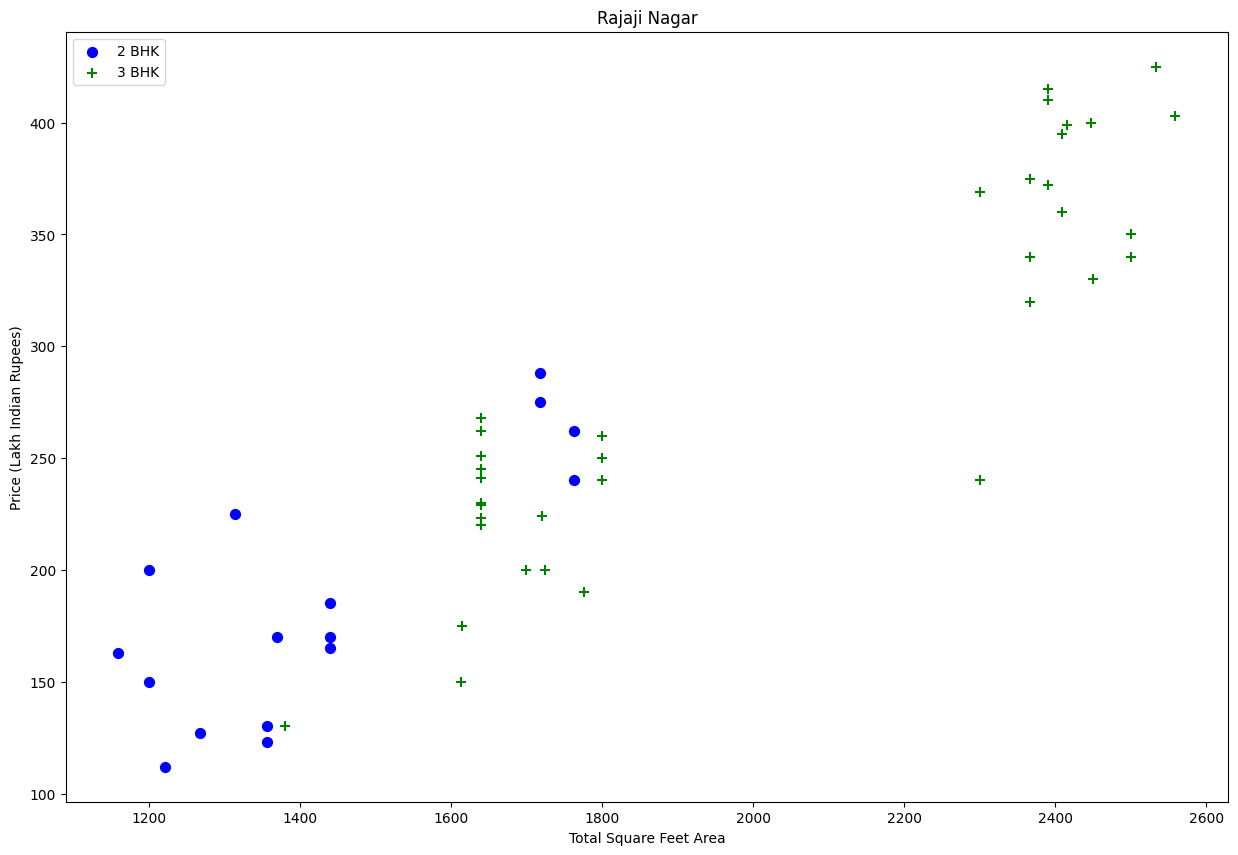

In [ ]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()

plot_scatter_chart(df,"Rajaji Nagar")

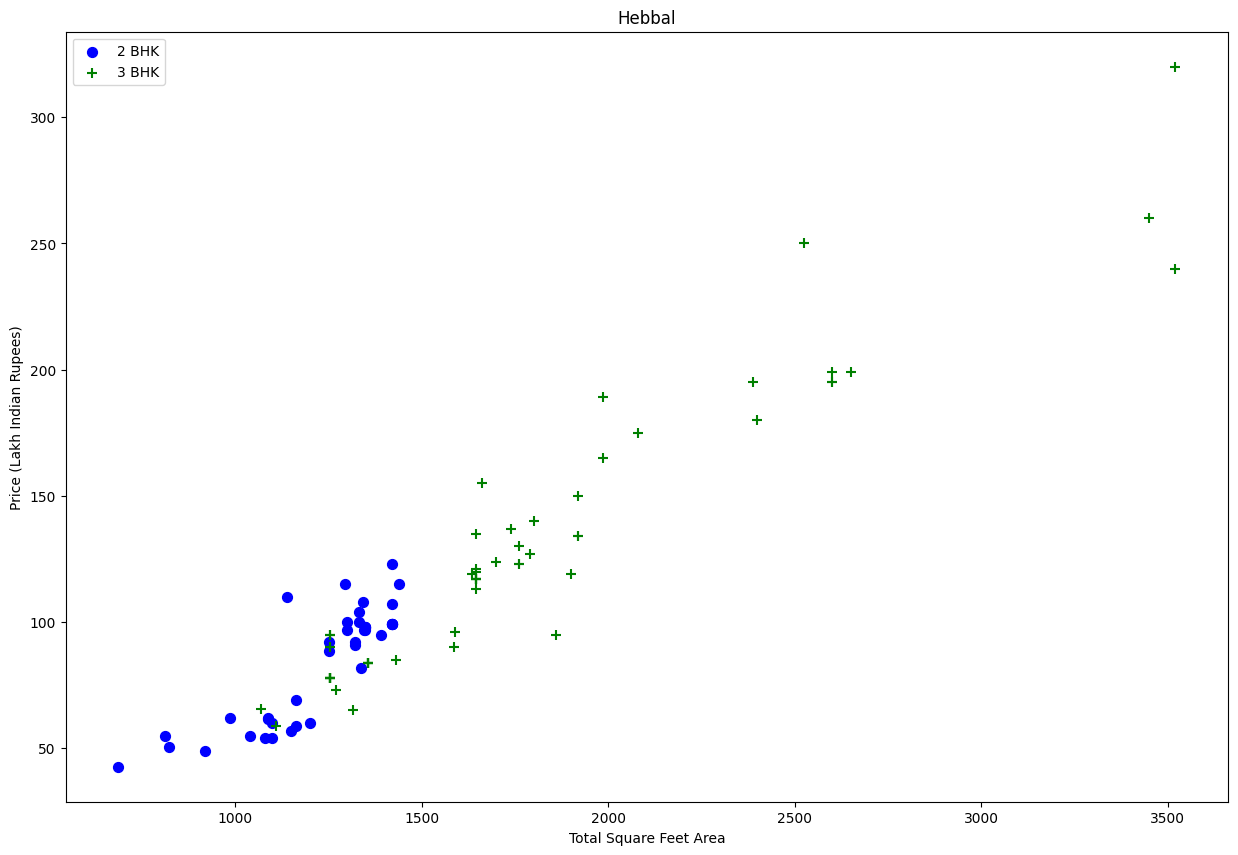

In [ ]:
plot_scatter_chart(df,"Hebbal")

####We should also remove properties where for same location, the price of (for example) 3 bedroom apartment is less than 2 bedroom apartment (with same square ft area). What we will do is for a given location, we will build a dictionary of stats per bhk

#####Now we can remove those 2 BHK apartments whose price_per_sqft is less than mean price_per_sqft of 1 BHK apartment

In [ ]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df = remove_bhk_outliers(df)
# df8 = df7.copy()
df.shape

(7014, 9)

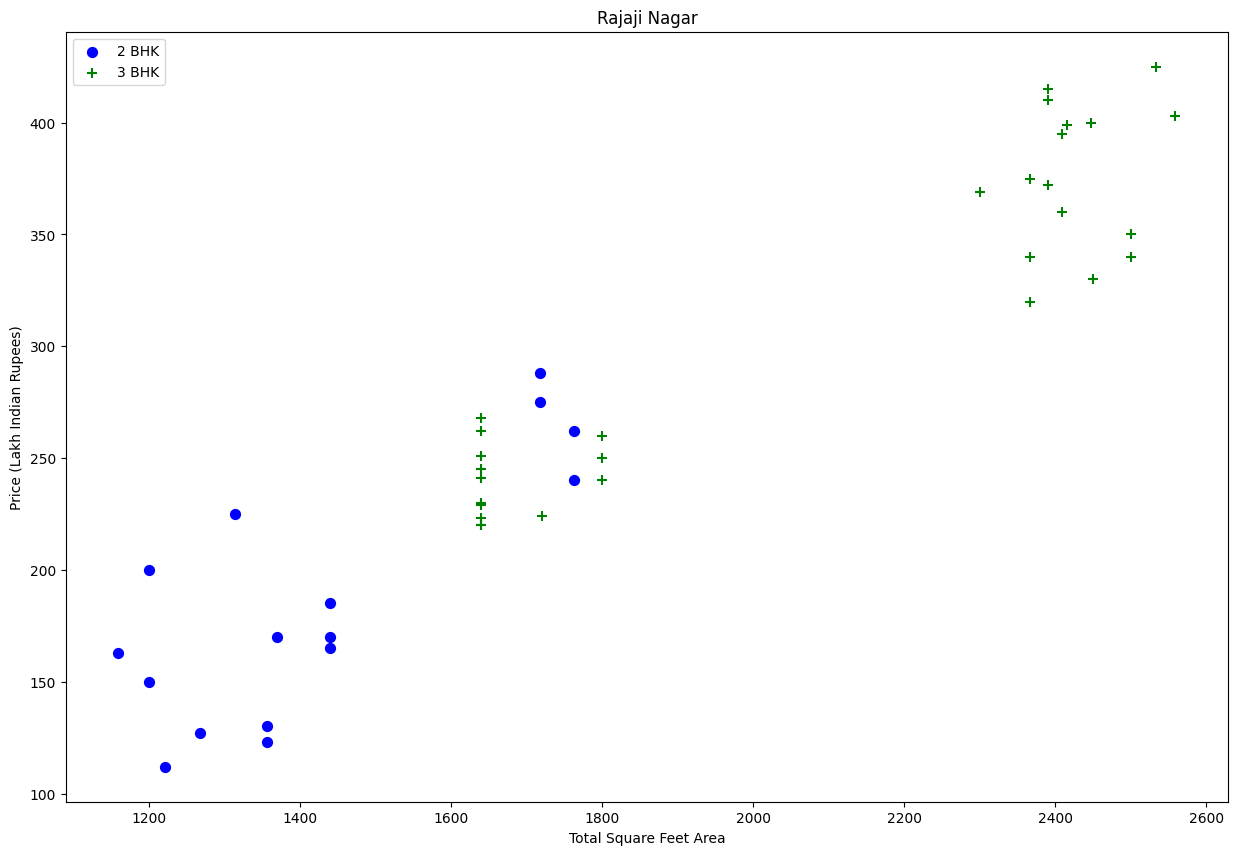

In [ ]:
plot_scatter_chart(df,"Rajaji Nagar")

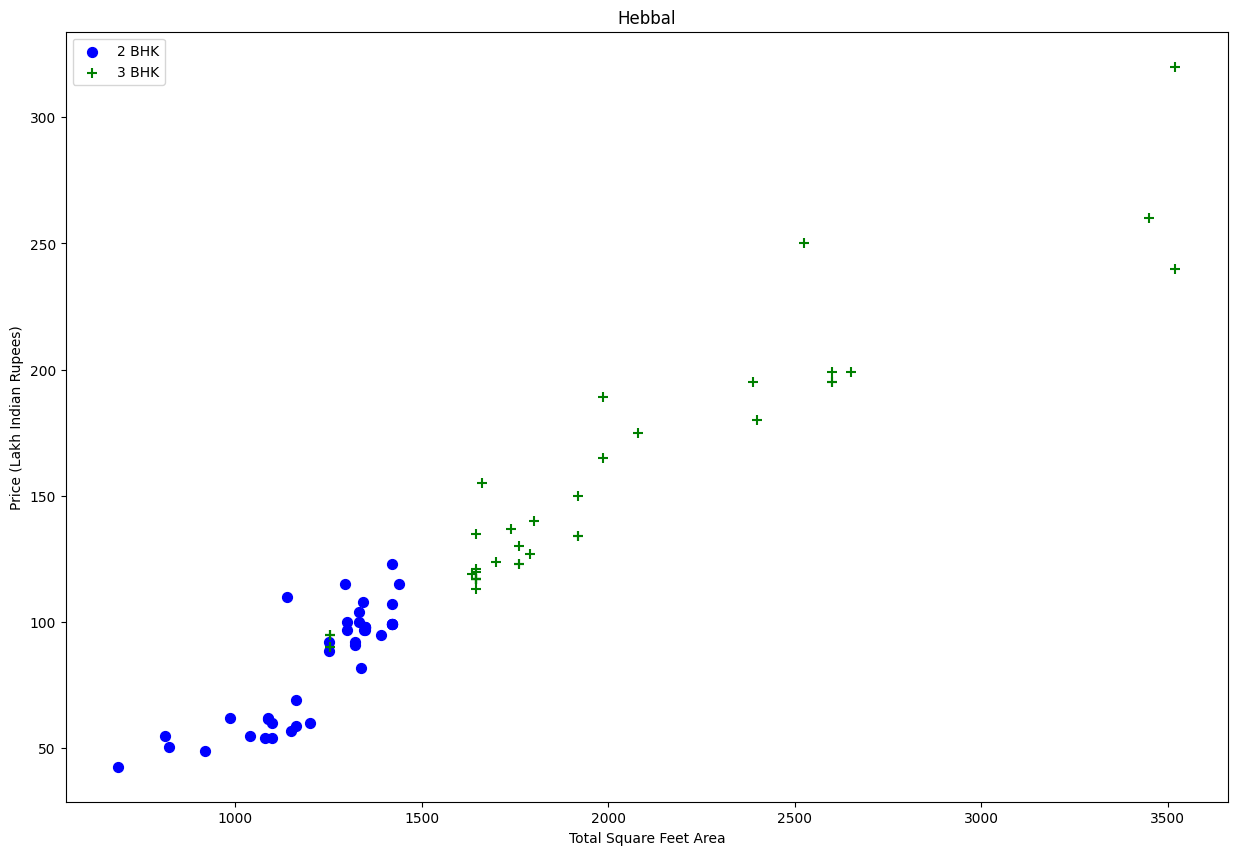

In [ ]:
plot_scatter_chart(df,"Hebbal")

Text(0, 0.5, 'Count')

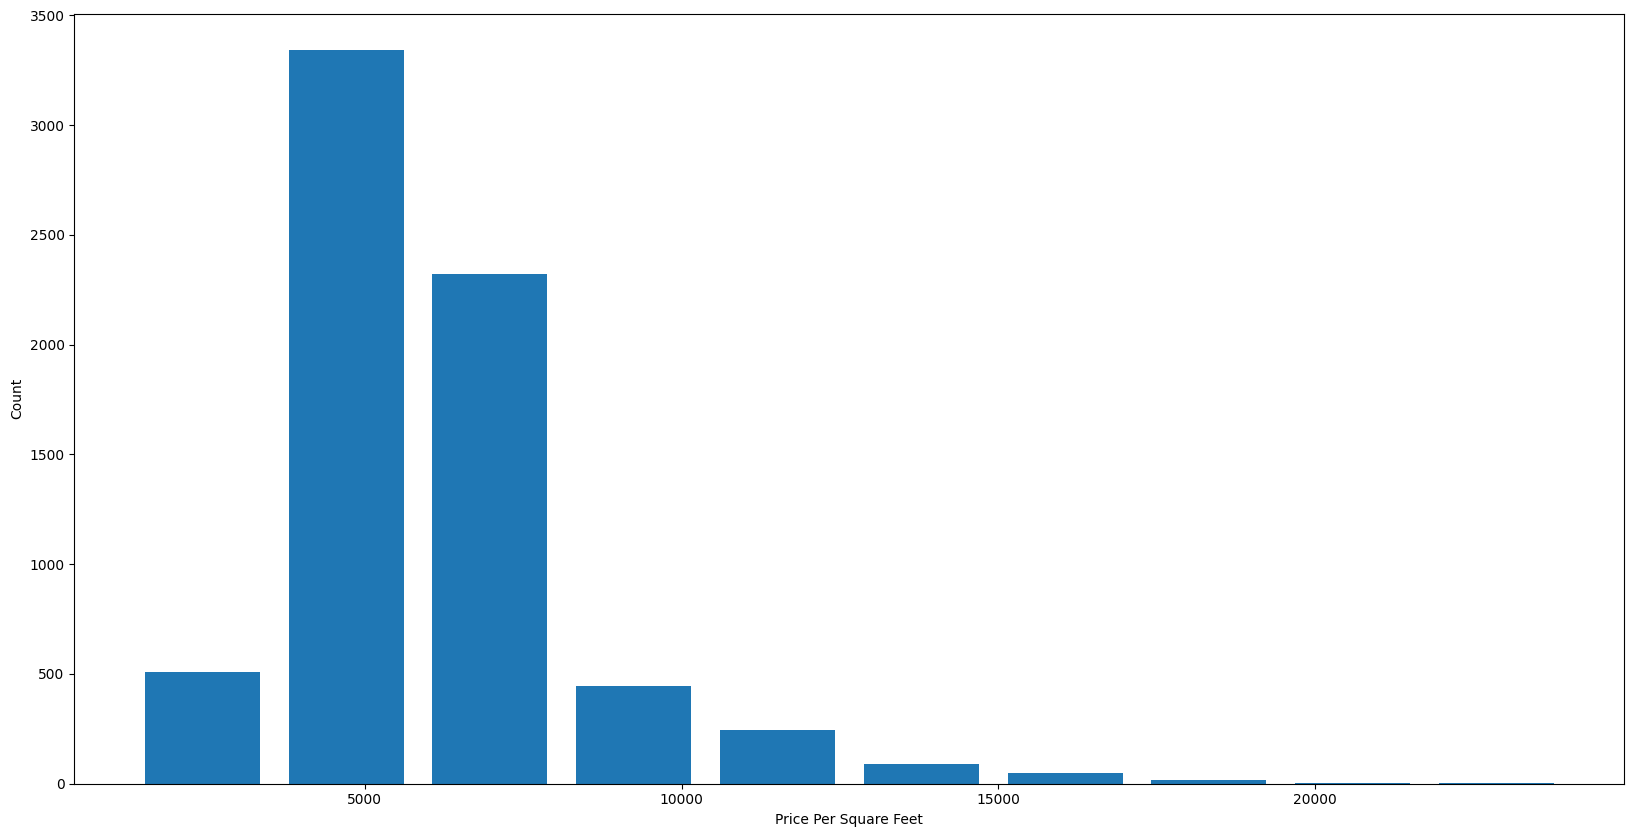

In [ ]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

#Outlier Removal Using Bathrooms Feature

In [ ]:
df.bath.unique()

array([ 4.,  3.,  2.,  8.,  1.,  5.,  6.,  7.,  9., 13.])

Text(0, 0.5, 'Count')

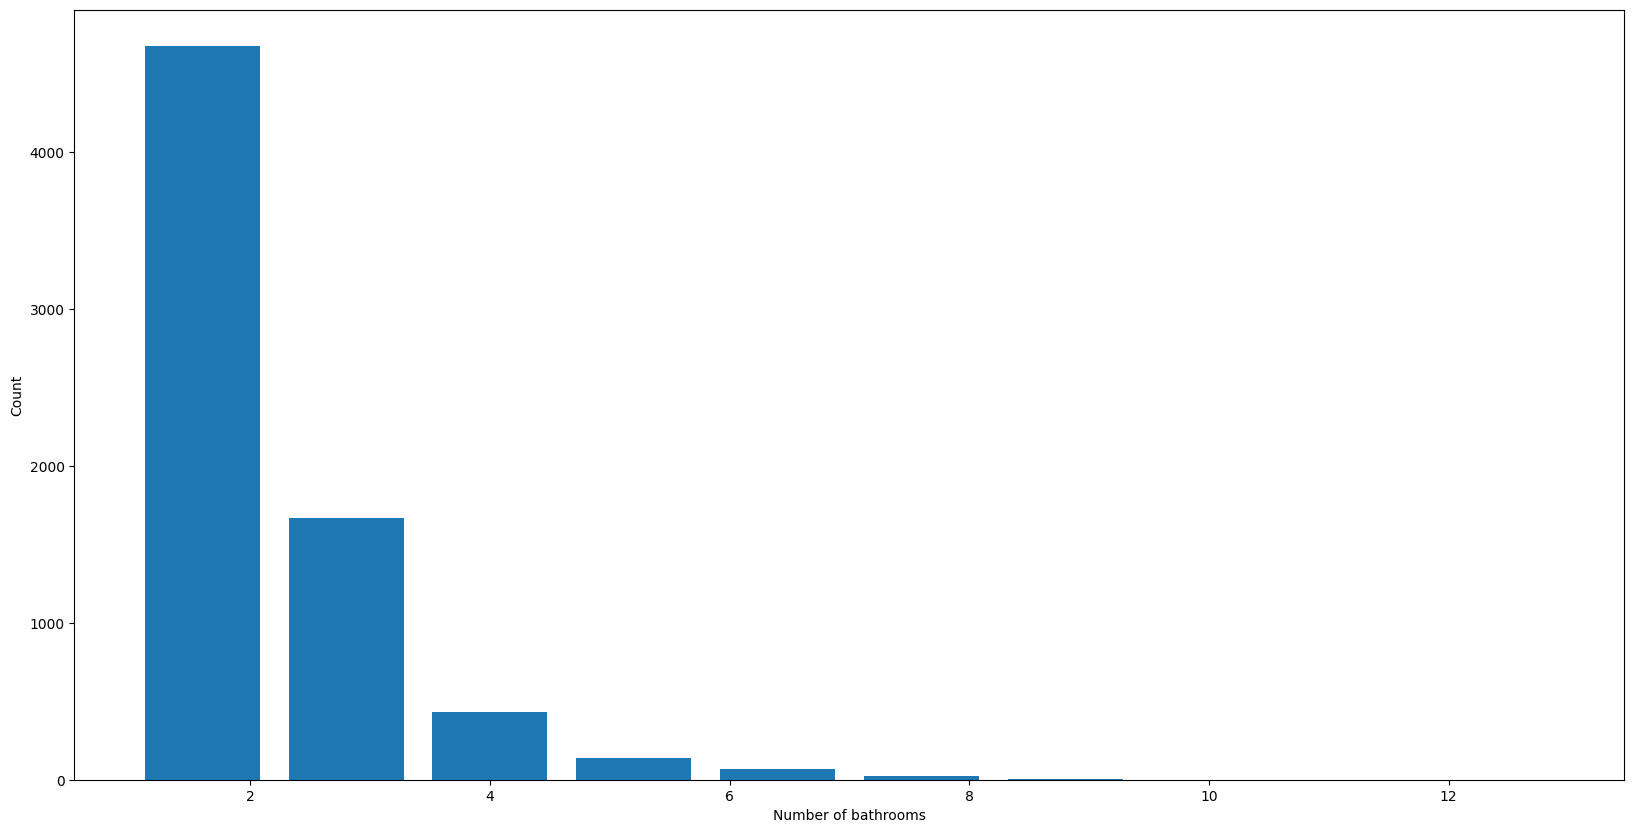

In [ ]:
plt.hist(df.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [ ]:
df[df.bath>10]

,area_type,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
9267,Super built-up Area,other,13 BHK,5425.0,13.0,0.0,275.0,13,5069.124424


####It is unusual to have 2 more bathrooms than number of bedrooms in a home

In [ ]:
df[df.bath>df.bhk+2]

,area_type,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
1542,Built-up Area,Chikkabanavar,4 Bedroom,2460.0,7.0,2.0,80.0,4,3252.032520
6443,Super built-up Area,Thanisandra,3 BHK,1806.0,6.0,2.0,116.0,3,6423.034330
8082,Super built-up Area,other,6 BHK,11338.0,9.0,1.0,1000.0,6,8819.897689


######Again the business manager has a conversation with you (i.e. a data scientist) that if you have 4 bedroom home and even if you have bathroom in all 4 rooms plus one guest bathroom, you will have total bath = total bed + 1 max. Anything above that is an outlier or a data error and can be removed

In [ ]:
df = df[df.bath<df.bhk+2]
df.shape

(6947, 9)

In [ ]:
df.head(2)

,area_type,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Super built-up Area,1st Block Jayanagar,4 BHK,2850.0,4.0,1.0,428.0,4,15017.543860
1,Super built-up Area,1st Block Jayanagar,3 BHK,1630.0,3.0,2.0,194.0,3,11901.840491


In [ ]:
df.area_type.nunique()

4

In [ ]:
df = df.drop(['size','price_per_sqft'],axis='columns')
df.head(3)

,area_type,location,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,1st Block Jayanagar,2850.0,4.0,1.0,428.0,4
1,Super built-up Area,1st Block Jayanagar,1630.0,3.0,2.0,194.0,3
2,Super built-up Area,1st Block Jayanagar,1875.0,2.0,3.0,235.0,3


####Use One Hot Encoding For Location

In [ ]:
dummies = pd.get_dummies(df.location, dtype=float)
dummies.head(3)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df = pd.concat([df,dummies.drop('other',axis='columns')],axis='columns')
df.head()

,area_type,location,total_sqft,bath,balcony,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,Super built-up Area,1st Block Jayanagar,2850.0,4.0,1.0,428.0,4,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Super built-up Area,1st Block Jayanagar,1630.0,3.0,2.0,194.0,3,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Super built-up Area,1st Block Jayanagar,1875.0,2.0,3.0,235.0,3,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Built-up Area,1st Block Jayanagar,1200.0,2.0,0.0,130.0,3,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Super built-up Area,1st Block Jayanagar,1235.0,2.0,2.0,148.0,2,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df = df.drop('location',axis='columns')
df.head(2)

,area_type,total_sqft,bath,balcony,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,Super built-up Area,2850.0,4.0,1.0,428.0,4,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Super built-up Area,1630.0,3.0,2.0,194.0,3,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Perform one-hot encoding for area_type
area_type_encoded = pd.get_dummies(df['area_type'], prefix='area_type', drop_first=True)

# Concatenate the original DataFrame with the one-hot encoded columns
df = pd.concat([df, area_type_encoded], axis=1)

df.drop('area_type', axis=1, inplace=True)

df.head()


,total_sqft,bath,balcony,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,...,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area
0,2850.0,4.0,1.0,428.0,4,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,False,True
1,1630.0,3.0,2.0,194.0,3,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,False,True
2,1875.0,2.0,3.0,235.0,3,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,False,True
3,1200.0,2.0,0.0,130.0,3,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,False,False
4,1235.0,2.0,2.0,148.0,2,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,False,True


In [ ]:
df.head()

,total_sqft,bath,balcony,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,...,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area
0,2850.0,4.0,1.0,428.0,4,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,False,True
1,1630.0,3.0,2.0,194.0,3,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,False,True
2,1875.0,2.0,3.0,235.0,3,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,False,True
3,1200.0,2.0,0.0,130.0,3,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,False,False
4,1235.0,2.0,2.0,148.0,2,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,False,True


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6947 entries, 0 to 9849
Columns: 243 entries, total_sqft to area_type_Super built-up  Area
dtypes: bool(3), float64(239), int64(1)
memory usage: 12.8 MB


In [ ]:
# Convert boolean columns to int
df = df.astype({col: 'int' for col in df.select_dtypes(include='bool').columns})

# Now we can proceed with the VIF calculation as previously discussed


#VIF

In [ ]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Add a constant column to the DataFrame
X = add_constant(df)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)


                            feature        VIF
0                             const  23.666785
1                        total_sqft   6.129481
2                              bath   5.810025
3                           balcony   1.329248
4                             price   6.540839
..                              ...        ...
239                     Yelenahalli   1.010180
240                    Yeshwanthpur   1.038542
241          area_type_Carpet  Area   1.056646
242            area_type_Plot  Area   1.587355
243  area_type_Super built-up  Area   1.527774

[244 rows x 2 columns]


In [ ]:
print(vif_data[vif_data["VIF"] >= 10])

  feature        VIF
0   const  23.666785


#Build a Model Now...

In [ ]:
df.shape

(6947, 243)

In [ ]:
X = df.drop(['price'],axis='columns')
X.head(3)

,total_sqft,bath,balcony,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,...,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area
0,2850.0,4.0,1.0,4,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1
1,1630.0,3.0,2.0,3,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1
2,1875.0,2.0,3.0,3,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1


In [ ]:
X.shape

(6947, 242)

In [ ]:
y = df.price
y.head(3)

,price
0,428.0
1,194.0
2,235.0


In [ ]:
len(y)

6947

###Splitting

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [ ]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.8592947155170354

###Adjusted R square

In [ ]:
n = X_test.shape[0]  # number of observations
p = X_test.shape[1]  # number of predictors
r2 = lr_clf.score(X_test,y_test)
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print(adjusted_r2)

0.8296079859225477


##Using K Fold cross validation to measure accuracy of our LinearRegression model

In [ ]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.86787247, 0.85555018, 0.83702514, 0.87807216, 0.79039852])

In [ ]:
r2 = [0.86787247, 0.85555018, 0.83702514, 0.87807216, 0.79039852]

In [ ]:
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

In [ ]:
import numpy as np

In [ ]:
np.mean(r2)

0.845783694

##GridSearchCV for Linear Regression and LASSO

In [ ]:
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer, mean_squared_error, r2_score
import numpy as np
import pandas as pd

def adjusted_r2_score(y_true, y_pred, X):
    """Calculate the adjusted R^2 score."""
    r2 = r2_score(y_true, y_pred)
    n = X.shape[0]
    p = X.shape[1]
    return 1 - (1 - r2) * (n - 1) / (n - p - 1)

def rmse_score(y_true, y_pred):
    """Calculate RMSE."""
    return np.sqrt(mean_squared_error(y_true, y_pred))

def find_best_model_using_gridsearchcv(X, y):
    # Define models and their hyperparameters
    algos = {
        'linear_regression': {
            'model': Pipeline([
                ('scaler', StandardScaler()),  # Feature scaling
                ('regressor', LinearRegression())
            ]),
            'params': {
                # No hyperparameters to tune for LinearRegression
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [0.1, 0.5, 1, 2, 5, 10],
                'selection': ['random', 'cyclic']
            }
        },
        'ridge': {
            'model': Ridge(),
            'params': {
                'alpha': [0.1, 0.5, 1, 2, 5, 10]
            }
        }
    }

    results = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X, y)

        # Predict using the best estimator
        y_pred = gs.predict(X)

        # Calculate adjusted R^2 and RMSE
        adj_r2 = adjusted_r2_score(y, y_pred, X)
        rmse = rmse_score(y, y_pred)

        results.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_,
            'adjusted_r2': adj_r2,
            'rmse': rmse
        })

    return pd.DataFrame(results, columns=['model', 'best_score', 'best_params', 'adjusted_r2', 'rmse'])

# Example usage
best_model_results = find_best_model_using_gridsearchcv(X, y)
best_model_results


,model,best_score,best_params,adjusted_r2,rmse
0,linear_regression,0.845784,{},0.841596,30.853355
1,lasso,0.793494,"{'alpha': 0.1, 'selection': 'cyclic'}",0.791134,35.428456
2,ridge,0.845870,{'alpha': 0.1},0.841576,30.855219


##=============================

##===

In [ ]:
# lr_clf
y_predict = lr_clf.predict(X_test)
pd.DataFrame({'Test':y_test, 'Prediction':y_predict}).head(10)

,Test,Prediction
7600,36.85,40.358422
9359,325.00,233.447488
795,66.00,61.266996
2522,44.00,39.623644
949,62.00,33.811476
1824,71.00,77.030371
9658,120.00,98.162783
703,41.13,62.290833
77,88.00,90.358647
3016,110.00,127.076511


### Evalution of the model

In [ ]:
from sklearn import metrics
MAE = metrics.mean_absolute_error(y_predict, y_test)
MSE = metrics.mean_squared_error(y_predict, y_test)
RMSE = np.sqrt(MSE)

pd.DataFrame([MAE, MSE, RMSE], index=['MAE', 'MSE', 'RMSE'], columns=['Metrics'])

,Metrics
MAE,15.728459
MSE,723.124933
RMSE,26.890982


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.compat import lzip
import scipy.stats as stats

# Assuming y_test and y_pred are available
residuals = y_test - y_pred

# 1. Linearity and Homoscedasticity
plt.figure(figsize=(12, 6))

# Residuals vs Fitted Values
plt.subplot(1, 2, 1)
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')

# Residuals histogram
plt.subplot(1, 2, 2)
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.title('Histogram of Residuals')

plt.tight_layout()
plt.show()

# 2. Autocorrelation
dw_stat = durbin_watson(residuals)
print(f'Durbin-Watson statistic: {dw_stat:.2f}')

# 3. Breusch-Pagan Test for Homoscedasticity
# Fit the model to get residuals
import statsmodels.api as sm
X_with_const = sm.add_constant(X_test)  # Add a constant for intercept
model = sm.OLS(y_test, X_with_const).fit()
bp_test = het_breuschpagan(model.resid, model.model.exog)
bp_test_labels = ['Lagrange Multiplier Stat', 'p-value', 'f-value', 'f p-value']
print('Breusch-Pagan test results:')
print(pd.DataFrame(lzip(bp_test_labels, bp_test), columns=['Test Statistic', 'Value']))

# 4. Normality of Residuals
# Q-Q Plot
plt.figure(figsize=(6, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()

# Shapiro-Wilk Test
shapiro_test = stats.shapiro(residuals)
print(f'Shapiro-Wilk test: Statistic={shapiro_test.statistic:.3f}, p-value={shapiro_test.pvalue:.3f}')


#**Assumptions**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.compat import lzip
import scipy.stats as stats

# Assuming y_test and y_pred are available
residuals = y_test - y_predict

Text(0.5, 1.0, 'Residuals vs Fitted Values')

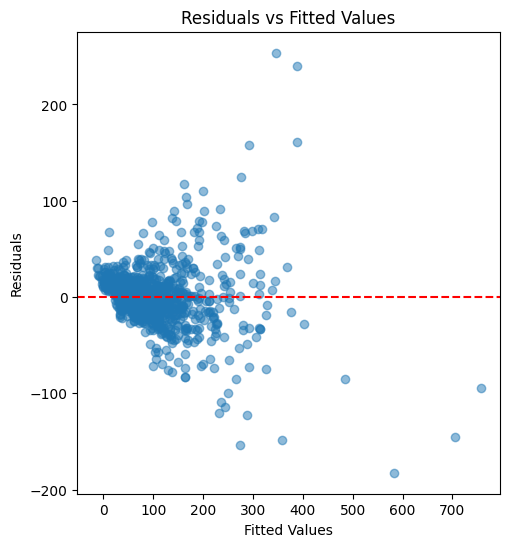

In [ ]:

# 1. Linearity and Homoscedasticity
plt.figure(figsize=(12, 6))

# Residuals vs Fitted Values
plt.subplot(1, 2, 1)
plt.scatter(y_predict, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')

<Axes: ylabel='price'>

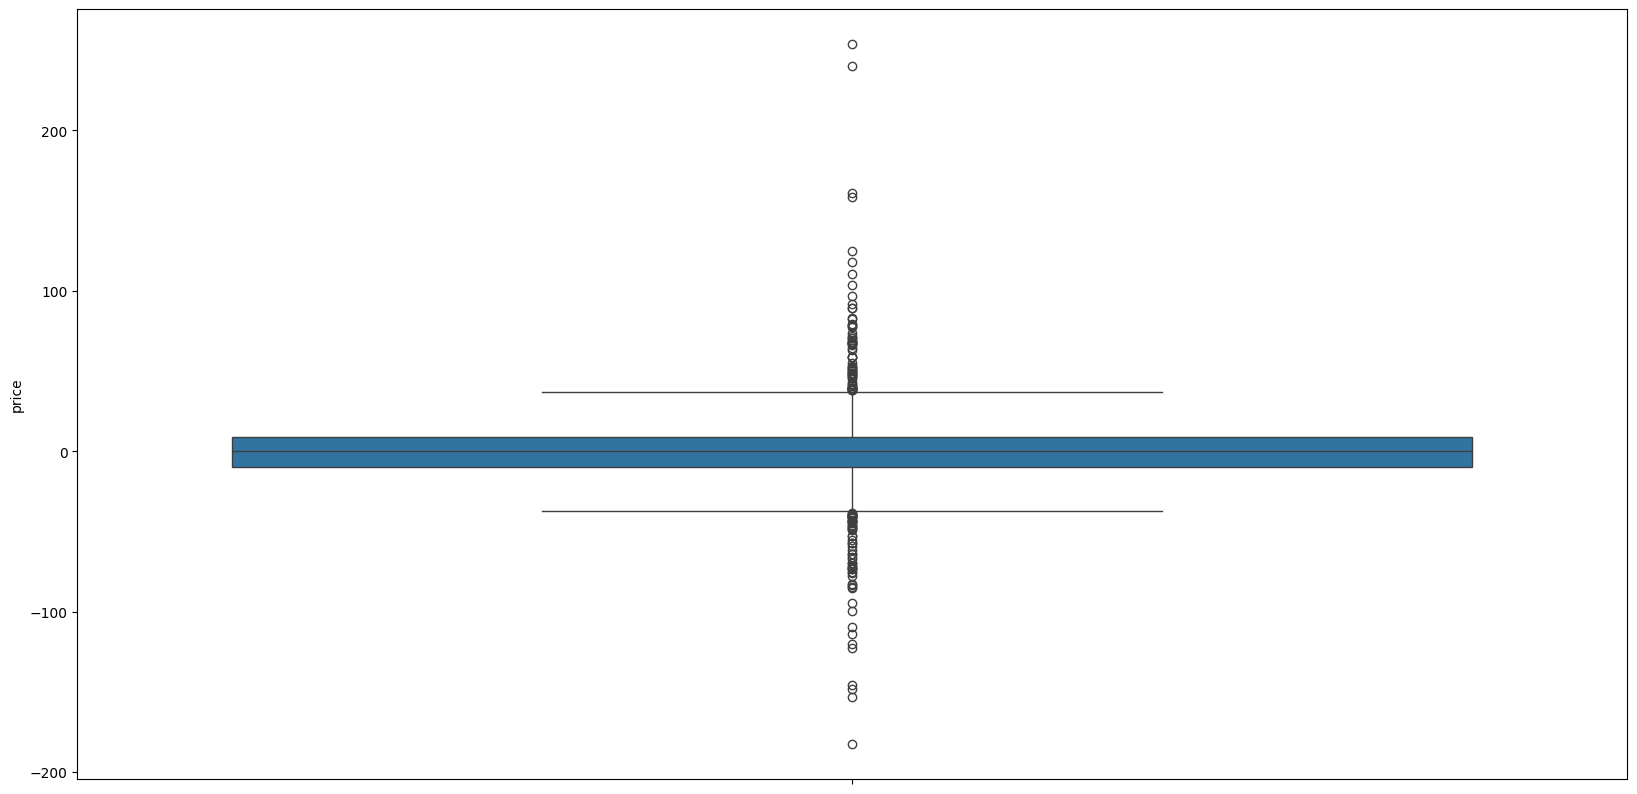

In [ ]:
sns.boxplot(residuals)

#Cooks Distance

In [ ]:
from statsmodels.stats.outliers_influence import OLSInfluence
import statsmodels.api as sm

# Add constant to the features matrix
X_with_const = sm.add_constant(X)

# Fit the model using statsmodels
model = sm.OLS(y, X_with_const).fit()

# Calculate Cook's distance
influence = OLSInfluence(model)
cooks_d = influence.cooks_distance[0]

# Identify influential points (e.g., Cook's distance > 4 / n)
n = X.shape[0]
influential_points = np.where(cooks_d > 4 / n)[0]

# Print Cook's distance for each point and influential points
print("Cook's Distance for each point:")
print(cooks_d)

print("\nInfluential points (indices):")
influential_points


Cook's Distance for each point:
0       5.579614e-03
1       1.990453e-03
2       6.405243e-04
3       4.602423e-03
4       3.219777e-03
            ...     
9842    3.386722e-06
9844    8.509530e-05
9845    3.809910e-05
9848    1.517805e-07
9849    2.574114e-05
Length: 6947, dtype: float64

Influential points (indices):


array([   0,    1,    2,    3,    4,    5,    6,    9,   31,   50,   60,
         62,  194,  223,  231,  235,  396,  403,  409,  475,  478,  482,
        483,  485,  486,  492,  494,  496,  610,  612,  613,  614,  615,
        616,  618,  619,  620,  622,  626,  635,  651,  652,  653,  654,
        655,  656,  657,  658,  659,  660,  675,  676,  785,  790,  812,
        923,  924,  925,  926, 1010, 1018, 1162, 1163, 1164, 1166, 1170,
       1237, 1266, 1267, 1268, 1273, 1275, 1278, 1280, 1306, 1315, 1317,
       1318, 1319, 1321, 1328, 1329, 1330, 1331, 1333, 1334, 1336, 1337,
       1360, 1452, 1455, 1466, 1787, 1796, 1798, 1825, 1826, 1828, 1830,
       1867, 1934, 1938, 1942, 2242, 2254, 2484, 2597, 2598, 2601, 2603,
       2606, 2609, 2637, 2677, 2684, 2689, 2693, 2694, 2698, 2718, 2719,
       2722, 2723, 2727, 2729, 2730, 2733, 2735, 2736, 2737, 2739, 2740,
       2871, 2873, 2875, 2909, 2916, 2941, 2954, 3086, 3087, 3088, 3225,
       3235, 3238, 3367, 3417, 3424, 3435, 3436, 34

In [ ]:
influential_points.shape

(247,)

In [ ]:
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd

def adjusted_r2_score(y_true, y_pred, X):
    """Calculate the adjusted R^2 score."""
    r2 = r2_score(y_true, y_pred)
    n = X.shape[0]
    p = X.shape[1]
    return 1 - (1 - r2) * (n - 1) / (n - p - 1)

def rmse_score(y_true, y_pred):
    """Calculate RMSE."""
    return np.sqrt(mean_squared_error(y_true, y_pred))

def find_best_model_using_gridsearchcv(X, y):
    """Find the best model using GridSearchCV and return performance metrics."""
    algos = {
        'linear_regression': {
            'model': Pipeline([
                ('scaler', StandardScaler()),  # Feature scaling
                ('regressor', LinearRegression())
            ]),
            'params': {}
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [0.1, 0.5, 1, 2, 5, 10],
                'selection': ['random', 'cyclic']
            }
        },
        'ridge': {
            'model': Ridge(),
            'params': {
                'alpha': [0.1, 0.5, 1, 2, 5, 10]
            }
        }
    }

    results = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X, y)

        y_pred = gs.predict(X)
        adj_r2 = adjusted_r2_score(y, y_pred, X)
        rmse = rmse_score(y, y_pred)

        results.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_,
            'adjusted_r2': adj_r2,
            'rmse': rmse
        })

    return pd.DataFrame(results, columns=['model', 'best_score', 'best_params', 'adjusted_r2', 'rmse'])

# Original model results
original_model_results = find_best_model_using_gridsearchcv(X, y)

# Remove influential points
mask = np.ones(X.shape[0], dtype=bool)
mask[influential_points] = False
X_clean = X[mask]
y_clean = y[mask]

# Re-run the model on the cleaned data
cleaned_model_results = find_best_model_using_gridsearchcv(X_clean, y_clean)

# Create a DataFrame to compare results
comparison_df = pd.DataFrame({
    'Metric': ['Model', 'Best Score', 'Best Params', 'Adjusted R^2', 'RMSE'],
    'Before': [
        original_model_results.loc[original_model_results['best_score'].idxmax(), 'model'],
        original_model_results.loc[original_model_results['best_score'].idxmax(), 'best_score'],
        original_model_results.loc[original_model_results['best_score'].idxmax(), 'best_params'],
        original_model_results.loc[original_model_results['best_score'].idxmax(), 'adjusted_r2'],
        original_model_results.loc[original_model_results['best_score'].idxmax(), 'rmse']
    ],
    'After': [
        cleaned_model_results.loc[cleaned_model_results['best_score'].idxmax(), 'model'],
        cleaned_model_results.loc[cleaned_model_results['best_score'].idxmax(), 'best_score'],
        cleaned_model_results.loc[cleaned_model_results['best_score'].idxmax(), 'best_params'],
        cleaned_model_results.loc[cleaned_model_results['best_score'].idxmax(), 'adjusted_r2'],
        cleaned_model_results.loc[cleaned_model_results['best_score'].idxmax(), 'rmse']
    ]
})

comparison_df




,Metric,Before,After
0,Model,ridge,ridge
1,Best Score,0.84587,0.896123
2,Best Params,{'alpha': 0.1},{'alpha': 0.1}
3,Adjusted R^2,0.841576,0.898046
4,RMSE,30.855219,19.814734


In [ ]:
# Create a DataFrame to compare results
comparison_df = pd.DataFrame({
    'Metric': ['Model', 'Best Score', 'Best Params', 'Adjusted R^2', 'RMSE'],
    'Linear Regression Before': [
        original_model_results.loc[original_model_results['model'] == 'linear_regression', 'model'].values[0],
        original_model_results.loc[original_model_results['model'] == 'linear_regression', 'best_score'].values[0],
        original_model_results.loc[original_model_results['model'] == 'linear_regression', 'best_params'].values[0],
        original_model_results.loc[original_model_results['model'] == 'linear_regression', 'adjusted_r2'].values[0],
        original_model_results.loc[original_model_results['model'] == 'linear_regression', 'rmse'].values[0]
    ],
    'Lasso Before': [
        original_model_results.loc[original_model_results['model'] == 'lasso', 'model'].values[0],
        original_model_results.loc[original_model_results['model'] == 'lasso', 'best_score'].values[0],
        original_model_results.loc[original_model_results['model'] == 'lasso', 'best_params'].values[0],
        original_model_results.loc[original_model_results['model'] == 'lasso', 'adjusted_r2'].values[0],
        original_model_results.loc[original_model_results['model'] == 'lasso', 'rmse'].values[0]
    ],
    'Ridge Before': [
        original_model_results.loc[original_model_results['model'] == 'ridge', 'model'].values[0],
        original_model_results.loc[original_model_results['model'] == 'ridge', 'best_score'].values[0],
        original_model_results.loc[original_model_results['model'] == 'ridge', 'best_params'].values[0],
        original_model_results.loc[original_model_results['model'] == 'ridge', 'adjusted_r2'].values[0],
        original_model_results.loc[original_model_results['model'] == 'ridge', 'rmse'].values[0]
    ],
    'Linear Regression After': [
        cleaned_model_results.loc[cleaned_model_results['model'] == 'linear_regression', 'model'].values[0],
        cleaned_model_results.loc[cleaned_model_results['model'] == 'linear_regression', 'best_score'].values[0],
        cleaned_model_results.loc[cleaned_model_results['model'] == 'linear_regression', 'best_params'].values[0],
        cleaned_model_results.loc[cleaned_model_results['model'] == 'linear_regression', 'adjusted_r2'].values[0],
        cleaned_model_results.loc[cleaned_model_results['model'] == 'linear_regression', 'rmse'].values[0]
    ],
    'Lasso After': [
        cleaned_model_results.loc[cleaned_model_results['model'] == 'lasso', 'model'].values[0],
        cleaned_model_results.loc[cleaned_model_results['model'] == 'lasso', 'best_score'].values[0],
        cleaned_model_results.loc[cleaned_model_results['model'] == 'lasso', 'best_params'].values[0],
        cleaned_model_results.loc[cleaned_model_results['model'] == 'lasso', 'adjusted_r2'].values[0],
        cleaned_model_results.loc[cleaned_model_results['model'] == 'lasso', 'rmse'].values[0]
    ],
    'Ridge After': [
        cleaned_model_results.loc[cleaned_model_results['model'] == 'ridge', 'model'].values[0],
        cleaned_model_results.loc[cleaned_model_results['model'] == 'ridge', 'best_score'].values[0],
        cleaned_model_results.loc[cleaned_model_results['model'] == 'ridge', 'best_params'].values[0],
        cleaned_model_results.loc[cleaned_model_results['model'] == 'ridge', 'adjusted_r2'].values[0],
        cleaned_model_results.loc[cleaned_model_results['model'] == 'ridge', 'rmse'].values[0]
    ]
})

comparison_df


,Metric,Linear Regression Before,Lasso Before,Ridge Before,Linear Regression After,Lasso After,Ridge After
0,Model,linear_regression,lasso,ridge,linear_regression,lasso,ridge
1,Best Score,0.845784,0.793494,0.84587,0.896086,0.826341,0.896123
2,Best Params,{},"{'alpha': 0.1, 'selection': 'cyclic'}",{'alpha': 0.1},{},"{'alpha': 0.1, 'selection': 'random'}",{'alpha': 0.1}
3,Adjusted R^2,0.841596,0.791134,0.841576,0.897845,0.822672,0.898046
4,RMSE,30.853355,35.428456,30.855219,19.834292,26.132179,19.814734


# After removing influencial points

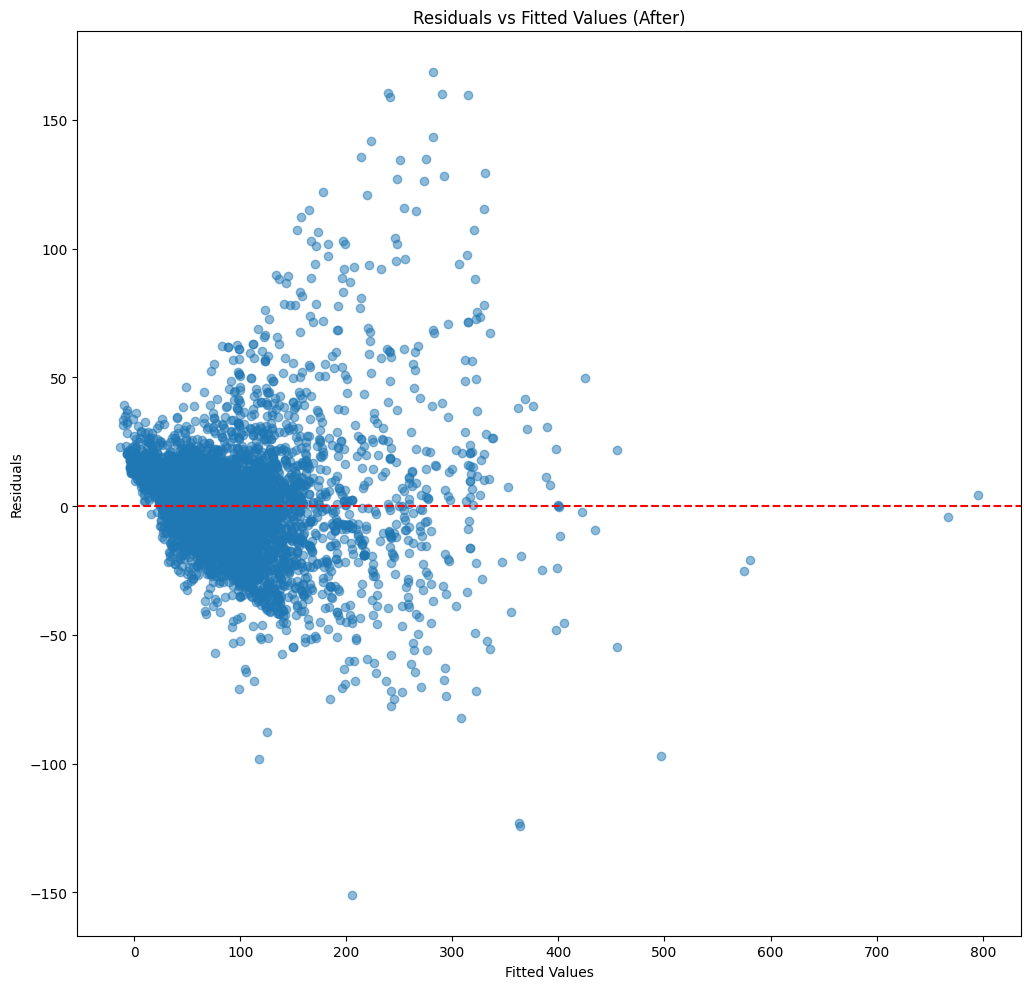

In [ ]:
# Remove influential points
mask = np.ones(X.shape[0], dtype=bool)
mask[influential_points] = False
X_clean = X[mask]
y_clean = y[mask]

# Add constant to the features matrix
X_clean_with_const = sm.add_constant(X_clean)

# Fit the model after removing influential points
model_after = sm.OLS(y_clean, X_clean_with_const).fit()
y_predict_after = model_after.predict(X_clean_with_const)
residuals_after = y_clean - y_predict_after

# Residuals vs Fitted Values After
plt.subplot(1, 2, 2)
plt.scatter(y_predict_after, residuals_after, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values (After)')

plt.tight_layout()
plt.show()


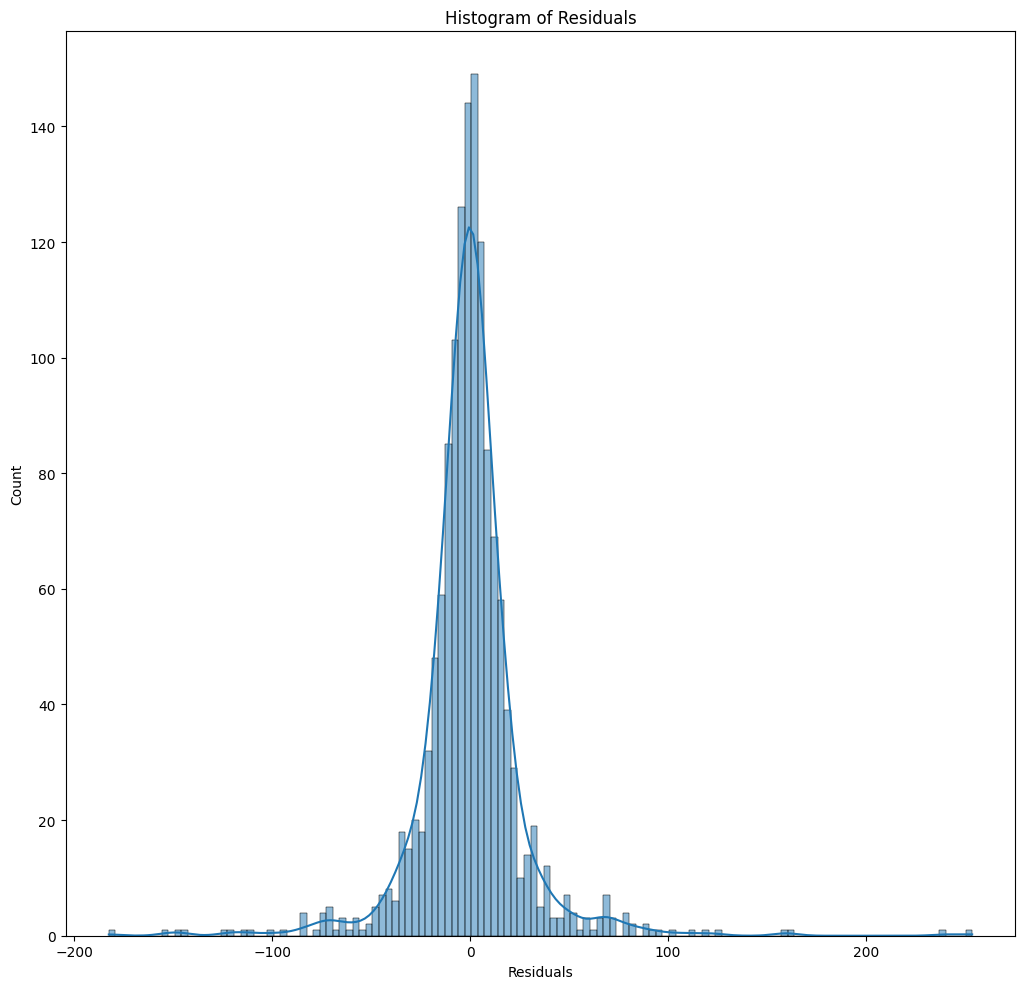

In [ ]:
# Residuals histogram
plt.subplot(1, 2, 2)
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.title('Histogram of Residuals')

plt.tight_layout()
plt.show()

## 2. Autocorrelation
####Durbin-Watson Statistic: Measures autocorrelation in the residuals. Values close to 2 suggest no autocorrelation.

In [ ]:
dw_stat = durbin_watson(residuals)
print(f'Durbin-Watson statistic: {dw_stat:.2f}')

Durbin-Watson statistic: 1.97


#3. Breusch-Pagan Test for Homoscedasticity

In [ ]:

# Fit the model to get residuals
import statsmodels.api as sm
X_with_const = sm.add_constant(X_test)  # Add a constant for intercept
model = sm.OLS(y_test, X_with_const).fit()
bp_test = het_breuschpagan(model.resid, model.model.exog)
bp_test_labels = ['Lagrange Multiplier Stat', 'p-value', 'f-value', 'f p-value']
print('Breusch-Pagan test results:')
print(pd.DataFrame(lzip(bp_test_labels, bp_test), columns=['Test Statistic', 'Value']))

Breusch-Pagan test results:
             Test Statistic         Value
0  Lagrange Multiplier Stat  4.538942e+02
1                   p-value  4.426636e-15
2                   f-value  2.576449e+00
3                 f p-value  3.125902e-24


In [ ]:
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan
import pandas as pd

# Add constant to the features matrix
X_with_const = sm.add_constant(X_test)  # Add a constant for intercept

# Fit the model to get residuals
model = sm.OLS(y_test, X_with_const).fit()

# Perform the Breusch-Pagan test
bp_test = het_breuschpagan(model.resid, model.model.exog)
bp_test_labels = ['Lagrange Multiplier Stat', 'p-value', 'f-value', 'f p-value']

# Display Breusch-Pagan test results
print('Breusch-Pagan test results:')
bp_test_df = pd.DataFrame(list(zip(bp_test_labels, bp_test)), columns=['Test Statistic', 'Value'])
print(bp_test_df)


Breusch-Pagan test results:
             Test Statistic         Value
0  Lagrange Multiplier Stat  4.538942e+02
1                   p-value  4.426636e-15
2                   f-value  2.576449e+00
3                 f p-value  3.125902e-24


#  4. Normality of Residuals

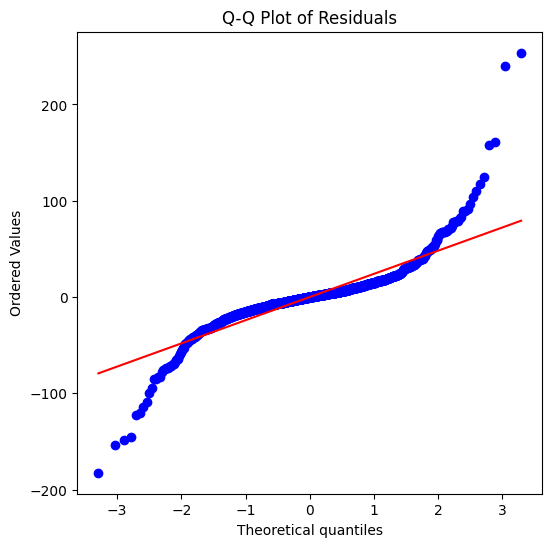

In [ ]:
# 4. Normality of Residuals
# Q-Q Plot
plt.figure(figsize=(6, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()

##Shapiro-Wilk Test: Tests if residuals are normally distributed. A high p-value indicates normality.

In [ ]:
# Shapiro-Wilk Test
shapiro_test = stats.shapiro(residuals)
print(f'Shapiro-Wilk test: Statistic={shapiro_test.statistic:.3f}, p-value={shapiro_test.pvalue:.3f}')

Shapiro-Wilk test: Statistic=0.803, p-value=0.000


##Kolmogorov-Smirnov Test for Normality

In [ ]:
# Kolmogorov-Smirnov Test for Normality
ks_test = stats.kstest(residuals, 'norm', args=(residuals.mean(), residuals.std()))
print(f'Kolmogorov-Smirnov test: Statistic={ks_test.statistic:.3f}, p-value={ks_test.pvalue:.3f}')


Kolmogorov-Smirnov test: Statistic=0.133, p-value=0.000


Sequence of EDA, Outlier Handling, Feature Engineering, and Feature Selection
The typical sequence in a data science project is as follows:

1. Exploratory Data Analysis (EDA)
EDA is the initial step to understand the data. It involves:

Understanding the data:
Data types (numerical, categorical)
Dimensions (rows, columns)
Basic statistics (mean, median, mode, standard deviation)
Handling missing values:
Identifying missing values
Imputation or removal based on analysis
Identifying outliers:
Using box plots, scatter plots, or statistical methods
Understanding the nature of outliers (error, valid data point)
Exploring relationships:
Correlation analysis
Visualization techniques (histograms, scatter plots, pair plots)
Discovering patterns and trends:
Identifying potential features
Understanding target variable distribution
2. Outlier Handling (Optional)
Based on the findings from EDA, decide whether to handle outliers. This step is optional and depends on the nature of the data and the problem.

If outliers are due to errors:
Correct or remove them
If outliers are valid data points:
Consider their impact on the model
Potentially transform or cap them
3. Feature Engineering
Create new features or transform existing ones to improve model performance.

Feature creation:
Combining existing features
Deriving new features from domain knowledge
Feature transformation:
Scaling (normalization, standardization)
Handling categorical features (encoding)
Feature binning
Handling skewness
4. Feature Selection
Identify the most relevant features for the model.

Filter methods:
Correlation analysis
Chi-square test
Wrapper methods:
Recursive Feature Elimination (RFE)
Embedded methods:
Regularization techniques (Lasso, Ridge)
Note: These steps are not strictly sequential. You might iterate between EDA, outlier handling, and feature engineering as you gain deeper insights into the data. Feature selection is often done after creating a baseline model to evaluate feature importance.

Additional Considerations:

Data cleaning: This step can be performed before or during EDA to handle inconsistencies, duplicates, and other data quality issues.
Domain knowledge: Incorporate domain expertise to guide feature engineering and selection.
Model evaluation: Continuously evaluate the impact of your feature engineering and selection decisions on model performance.
By following these steps and iteratively refining your approach, you can effectively extract valuable insights from your data and build robust models.